In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import os

This notebook includes the data cleaning and preparation phase of my data analysis project. All decisions are documented and justified to demonstrate transparent, reproducible data handling.
The primary goals of this notebook are to:

- Load and inspect the raw dataset
- Identify data quality issues such as missing values, inconsistencies and invalid entries
- Clean, transform, and standardise the data to prepare it for statistical testing and machine learning
- Store the cleaned dataset in a structured format for use in later analysis (EDA and ML)


These statistical concepts will feature more in notebook 2 but here are the main terms that will feature throughout the project

| Concept | Explanation |
|---------|-------------|
| **Mean** | The average value, calculated by summing all values and dividing by the total count. Useful for normally distributed data. |
| **Median** | The middle value when all data points are ordered. More robust to outliers and preferred for skewed data. |
| **Standard Deviation (STD)** | Measures how spread out the values are from the mean. Low STD = values close together; high STD = greater variability. |
| **Variance** | The average of the squared differences from the mean. It represents overall data spread and is the square of the standard deviation. |
| **Skewness** | Describes the asymmetry of a distribution. Positive skew = longer right tail; negative skew = longer left tail. |
| **Probability** | The likelihood that an event will occur. Higher probability means the event is more likely to happen. |

# 1.0 ETL (Extract, Transform, Load)
The data will be cleaned and prepared for statistical analysis, visualisation, and predictive modelling (linear regression).

## 1.1 Load the data

In [2]:
# Load the dataset
data_path = '../data/raw_data/student_social_media_addiction.csv'

try:
    df = pd.read_csv(data_path)
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ Dataset not found. Please download insurance.csv from Kaggle to data/raw/")
    raise

✅ Dataset loaded successfully!


## 1.2 Inspect the dataset
Begin by inspecting the structure and basic properties of the dataset.

In [3]:
# Preview first 5 rows of the dataset
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [4]:
# Check column names
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [5]:
# Check the shape of the dataset
df.shape

(705, 13)

In [6]:
# View column names and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [7]:
# Check quantity of dtypes
df.dtypes.value_counts()

object     6
int64      5
float64    2
Name: count, dtype: int64

We will rely heavily on the statistical analysis of our dataset to help us spot patterns in our historical data, helping us spot patterns in causation v outcome.

From initial inspection there looks to be sign of outliers, these will be confirmed with box and whisker and histogram plots.

In [8]:
# Get statistical analysis of the data
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [9]:
# Drop Student_ID from table. Although it is numeric it is only an identifier
numeric = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

In [10]:
df[numeric].describe()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


## 1.3 Deal with problem values:
- Address missing values 
- Drop duplicates 
- Inspect for outliers

In [11]:
# Check df shape before
df.shape

(705, 13)

In [12]:
# Check for null values
df.isna().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

There are no nulls in this dataset but if there were we could fill with with .fillna() or drop them depending on how many there were and what columns they were in.

In [13]:
# Check for duplicates
df.duplicated().sum()

0

No duplicates found in this dataset, they would have been dropped but keeping the first instance. Once nulls and duplicates were dropped the index would have been reset to keep it continuous from 0 to the last row.

### 1.3.1 - Plot numerical values to check for outliers
By plotting our values on boxplots and histograms we can check for outliers as well as checking distribution of our data. This could give us an early indication of whether our hypotheses are to be proved or disproved, but can't be confirmed without advanced visualisation.

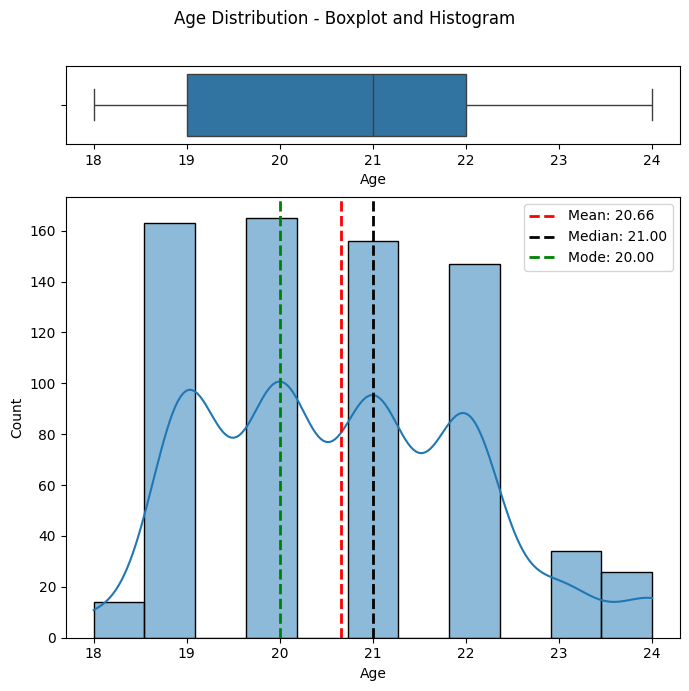

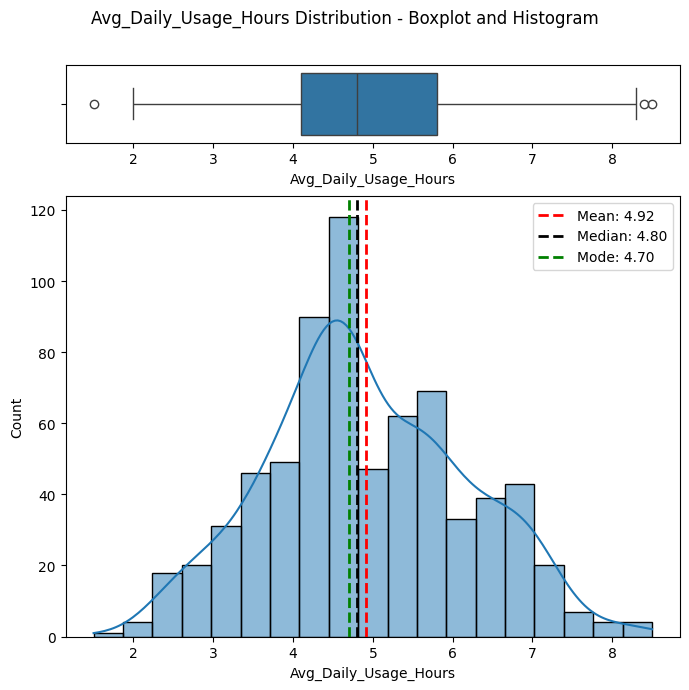

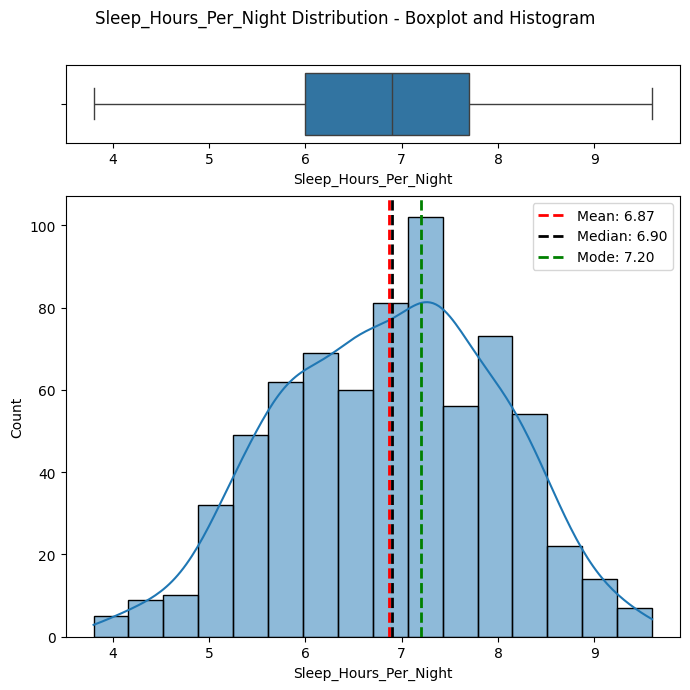

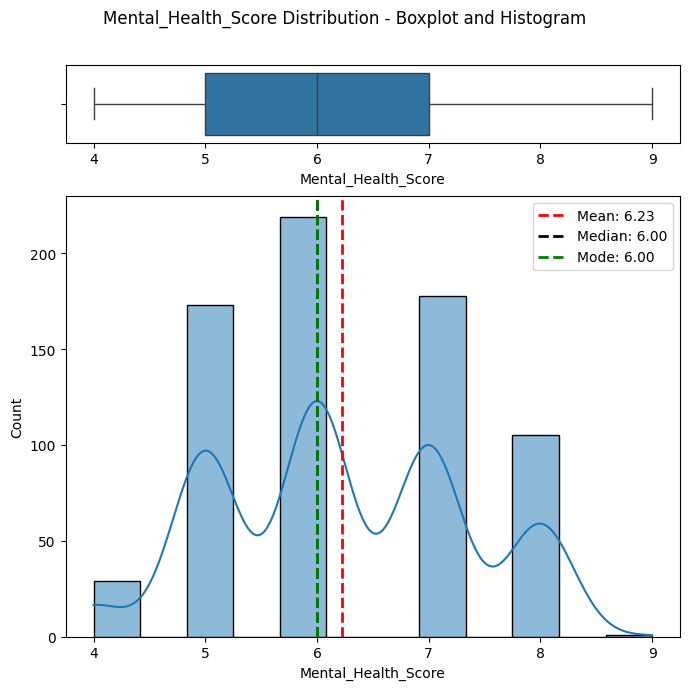

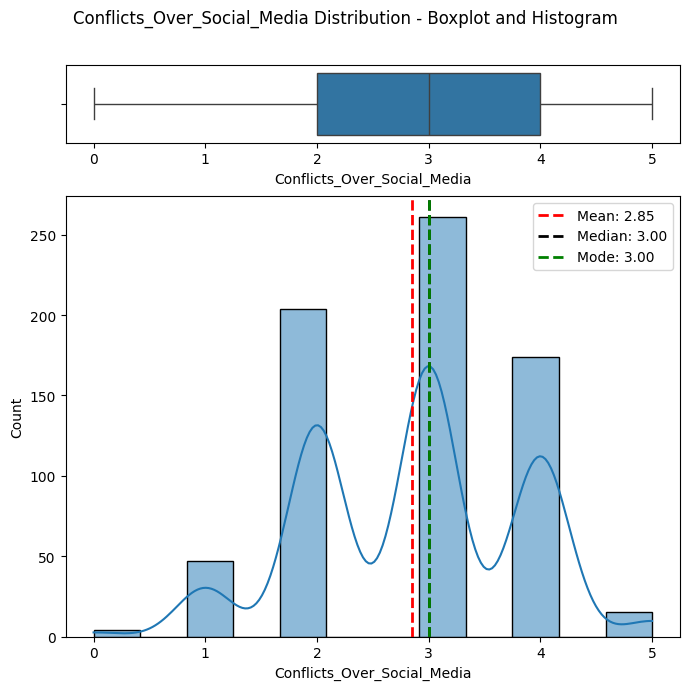

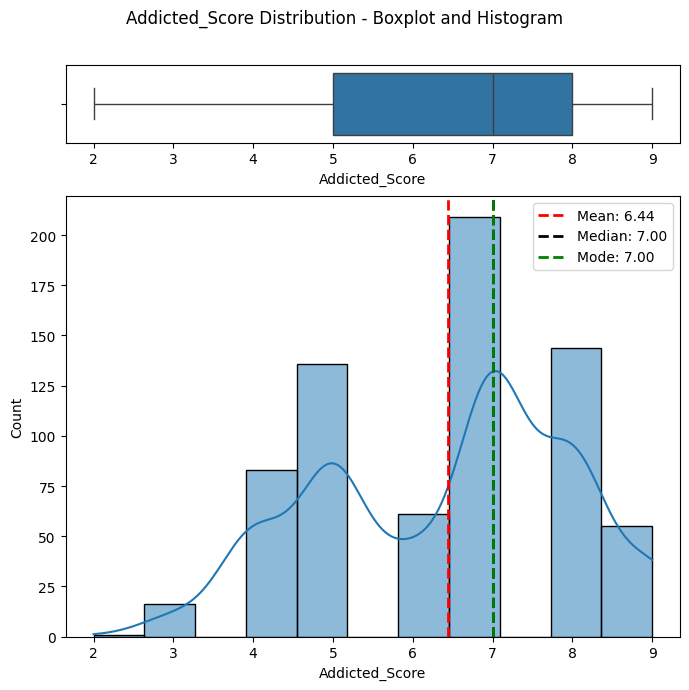

In [14]:
for col in numeric:
    fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(7,7), gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x=col, ax=axes[0])
    sns.histplot(data=df, x=col, kde=True, ax=axes[1])
    
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]

    plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {mean:.2f}")
    plt.axvline(median, color='k', linestyle='dashed', linewidth=2, label=f"Median: {median:.2f}")
    plt.axvline(mode, color='g', linestyle='dashed', linewidth=2, label=f"Mode: {mode:.2f}")

    plt.legend(loc="upper right", fontsize=10)
    
    plt.tight_layout()

    fig.suptitle(f"{col} Distribution - Boxplot and Histogram")

    plt.subplots_adjust(top=0.9)

    plt.show()

print("\n")

There were some outliers in the Average daily usage column (3) so they have been dropped from the dataset. The shape was also checked post removal to make sure only the intended values were deleted.

In [15]:
# Dealing with outliers in Average daily usage
Q1 = df['Avg_Daily_Usage_Hours'].quantile(0.25)
Q3 = df['Avg_Daily_Usage_Hours'].quantile(0.75)
IQR = Q3-Q1

bottom_outliers = Q1 - (1.5 * IQR)
top_outliers = Q3 + (1.5 * IQR)
print(f"top outliers are {top_outliers}")
print(f"bottom outliers are {bottom_outliers}")

top outliers are 8.35
bottom outliers are 1.5499999999999994


In [16]:
# Assign outliers to outliers
outliers = df[
    (df['Avg_Daily_Usage_Hours'] < bottom_outliers) |
    (df['Avg_Daily_Usage_Hours'] > top_outliers)
]

Outliers are done using 'bottom' and 'top' rather than the values of this field. This makes it reusable if new values were to be added and the boundaries move.

In [17]:
# Drop outliers from dataframe
df = df.drop(outliers.index)

In [18]:
# Check dataframe shape after dropping problem values
df.shape

(702, 13)

### 1.3.2 Plotting categorical data
We will plot this data to check frequency count for each and determine whether there are any anomalies in here that might skew the data. A KDE line will be included to show the distribution of the data

In [19]:
# Assign categorical columns to variable to plot them
categorical = ['Gender', 'Academic_Level', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status']

In [20]:
# Check value counts
for columns in categorical:
    print(f"The value counts for {columns} are:")
    print(df[columns].value_counts())
    print("\n")

The value counts for Gender are:
Gender
Female    351
Male      351
Name: count, dtype: int64


The value counts for Academic_Level are:
Academic_Level
Undergraduate    351
Graduate         324
High School       27
Name: count, dtype: int64


The value counts for Most_Used_Platform are:
Most_Used_Platform
Instagram    248
TikTok       153
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      20
WeChat        15
Snapchat      13
LINE          12
KakaoTalk     12
VKontakte     12
YouTube       10
Name: count, dtype: int64


The value counts for Affects_Academic_Performance are:
Affects_Academic_Performance
Yes    451
No     251
Name: count, dtype: int64


The value counts for Relationship_Status are:
Relationship_Status
Single             383
In Relationship    287
Complicated         32
Name: count, dtype: int64




Due to the country column having so many more unique values than all the other categorical columns it was kept separate and will be plotted on a pie chart to show the distribution.

In [21]:
# Check unique entries of country column (110)
df['Country'].nunique()

110

In [22]:
# Check top 15 of country by value count
df['Country'].value_counts().head(15)

Country
India          53
USA            38
Canada         34
Turkey         27
Mexico         27
Switzerland    27
Denmark        27
France         27
Spain          27
Ireland        27
UK             22
Russia         21
Italy          21
Japan          21
Bangladesh     20
Name: count, dtype: int64

In [23]:
# Create new order for two categorical fields
relationship_order = ['Single', 'In Relationship', 'Complicated']
academic_order = ['High School', 'Undergraduate', 'Graduate']

In [24]:
# Assign new order to field
df['Relationship_Status'] = pd.Categorical(df['Relationship_Status'], categories=relationship_order, ordered=True)
df['Academic_Level'] = pd.Categorical(df['Academic_Level'], categories=academic_order, ordered=True)

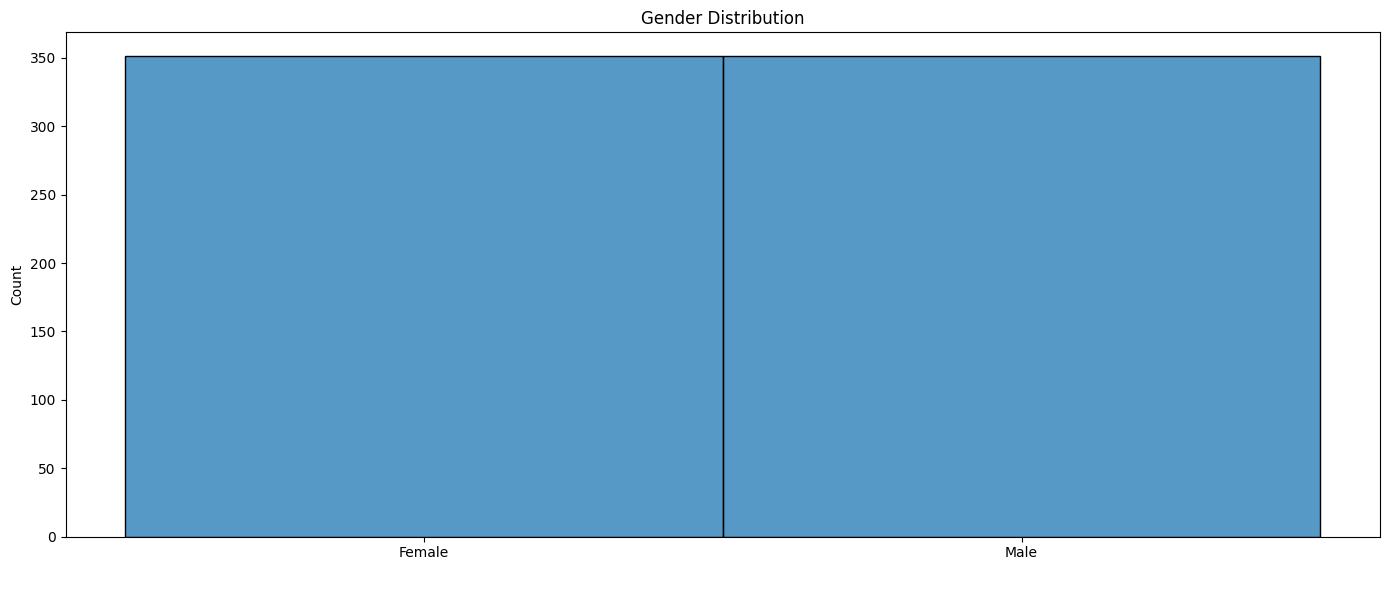

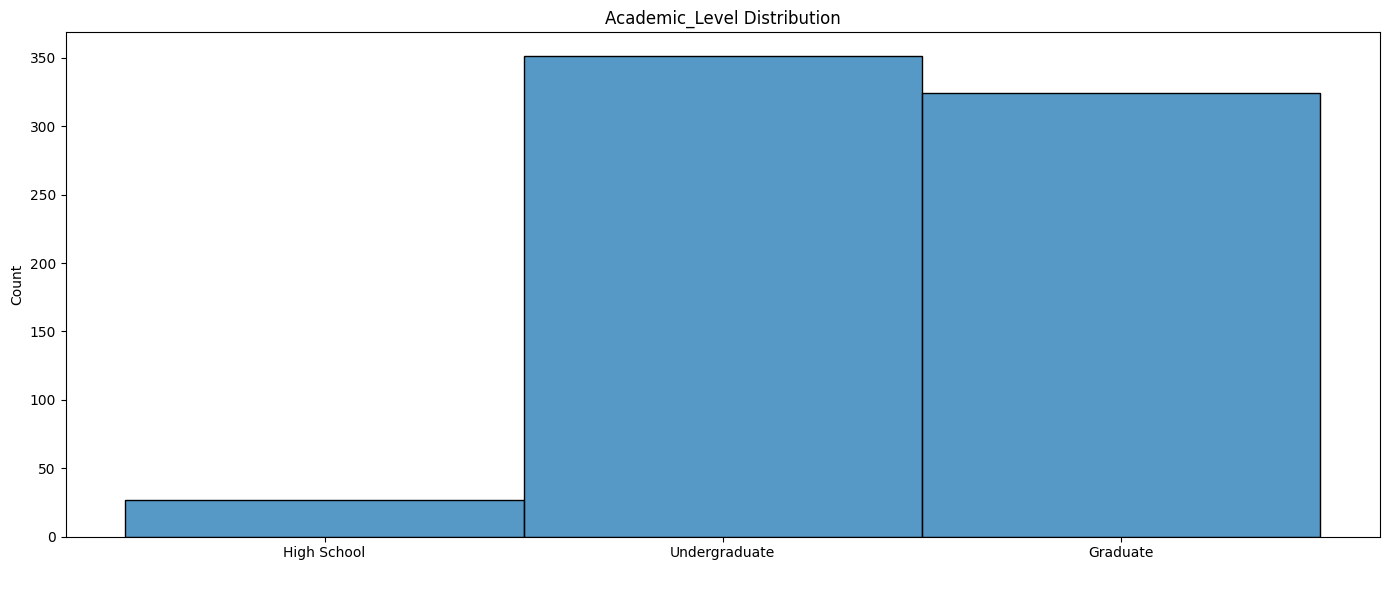

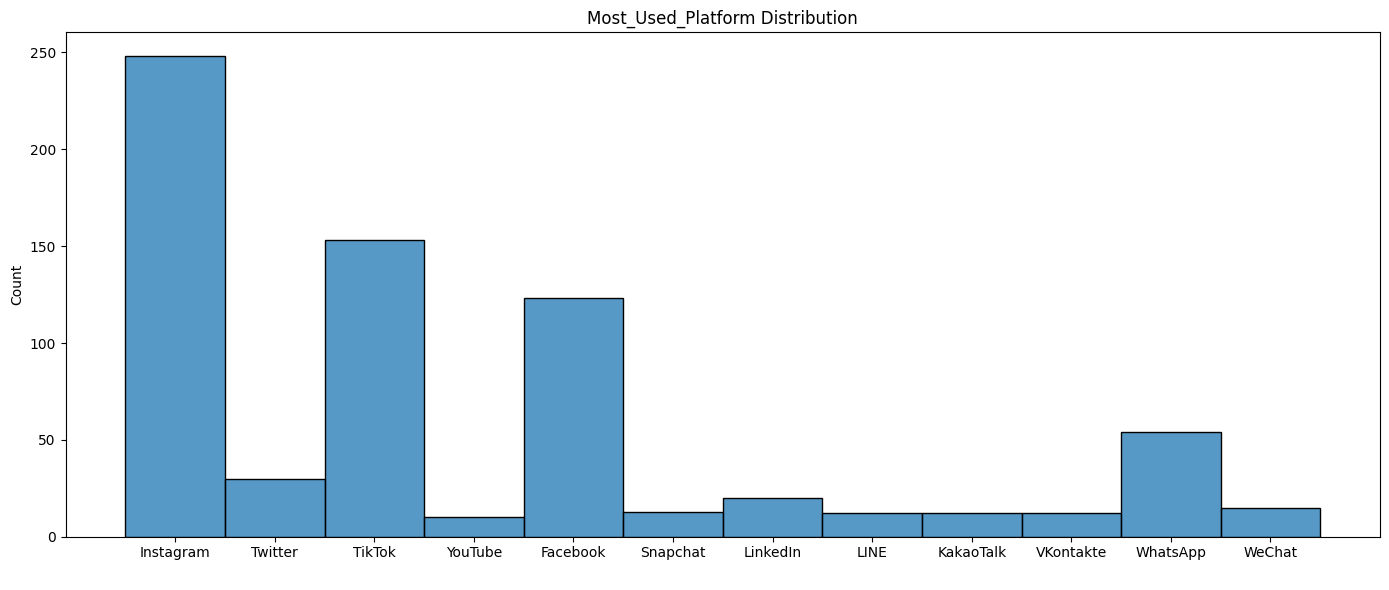

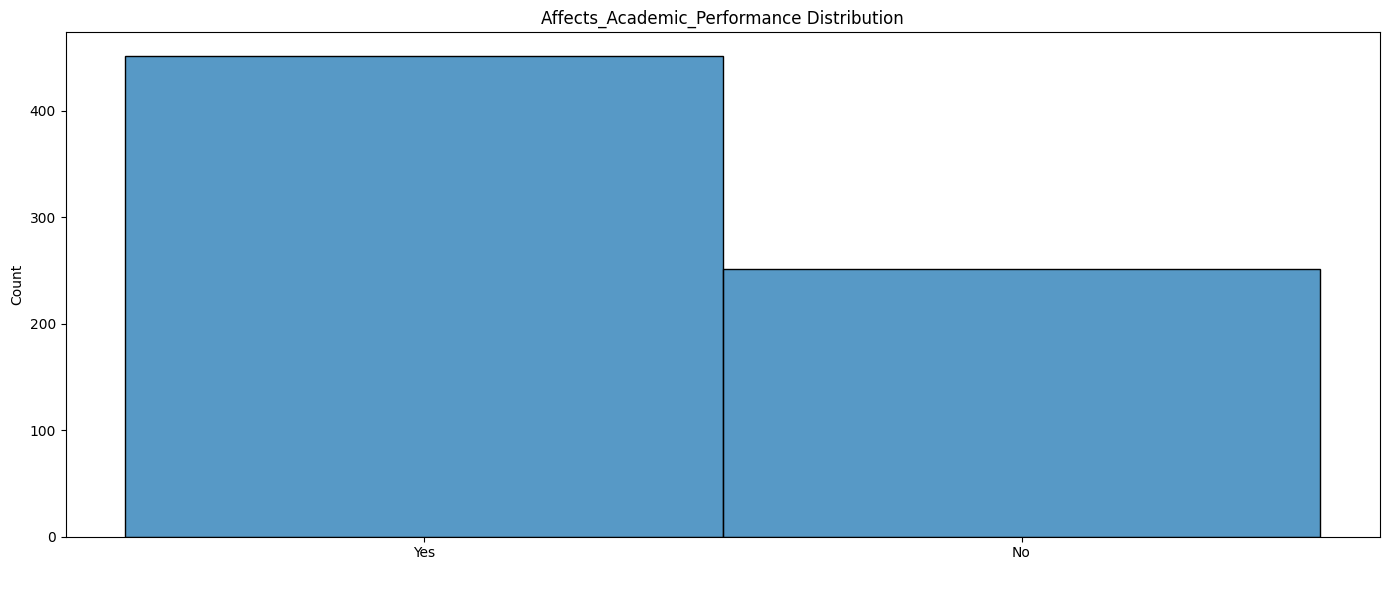

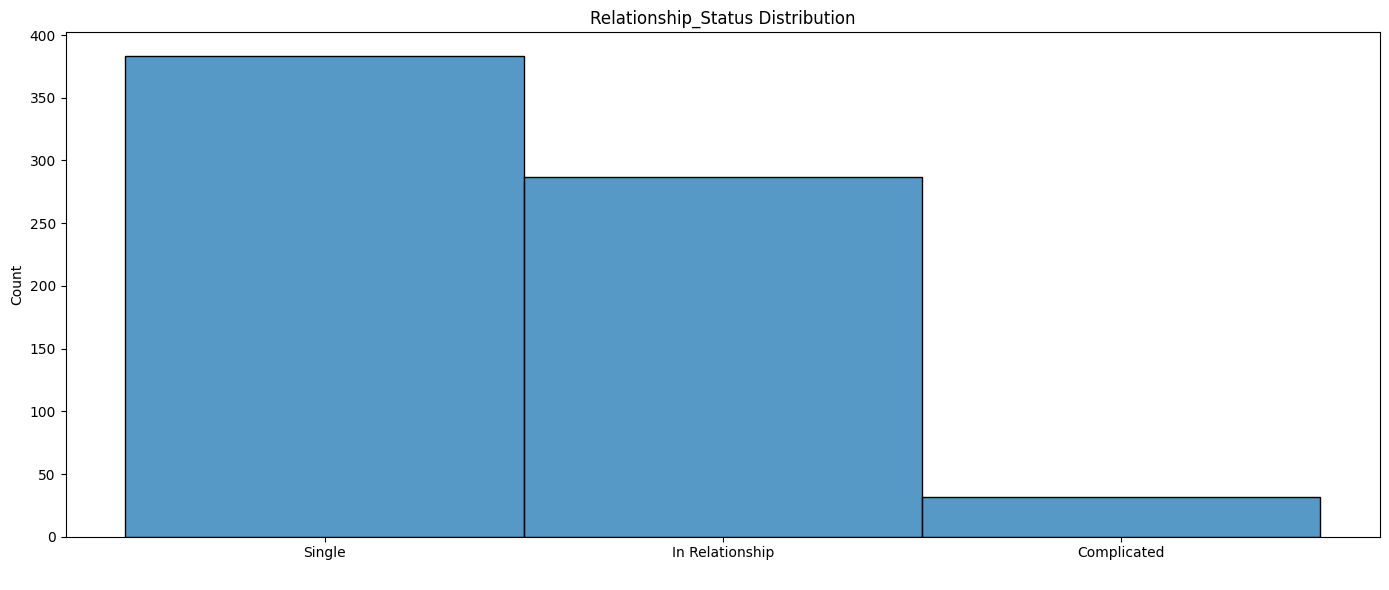

In [25]:
# Iterate over each column in categorical and plot their value count on a chart
for col in categorical:
    plt.figure(figsize=(14,6))
    sns.histplot(data=df, x=col)
    plt.title(f"{col} Distribution")
    plt.xlabel(" ")
    plt.tight_layout()
    plt.show()

print("\n")

By plotting categoricals we can see whether any of the fields are monopolised by one answer, for example if 95% of students were in a relationship there wouldn't be any insights we could gain from that column due to lack of variety.

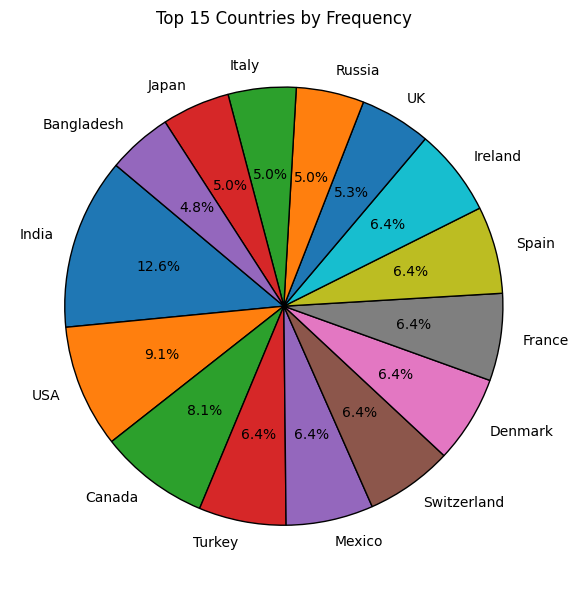

In [26]:
# Plot country on a piechart to show distribution
country_counts = df['Country'].value_counts().head(15)

plt.figure(figsize=(6, 6))
plt.pie(
    country_counts,
    labels=country_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Top 15 Countries by Frequency")
plt.tight_layout()
plt.show()

From plotting the categoricals I can see that there are no 'unknown' values across any of the categorical columns to be dealt with. This means we can keep the 703 rows in our df. 

## 1.4 Column management
We will drop any columns that are not relevant to our story, as well as tidy up the remaining columns that we are keeping.

In [27]:
# Make all column headers lowercase and remove leading and trailing whitespace to prevent errors calling columns
df.columns = df.columns.str.casefold().str.strip()

Making the column headers lowercase, replacing spaces with _ and deleting white space before and after the field name is standard practice to make coding easier with uniform formats across the dataframe.

In [28]:
# Preview the df to check the changes have been successful
df.head()

,student_id,age,gender,academic_level,country,avg_daily_usage_hours,most_used_platform,affects_academic_performance,sleep_hours_per_night,mental_health_score,relationship_status,conflicts_over_social_media,addicted_score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


## 1.5 Changing dtypes
We can check out data types with a view to change any of them for functionality reasons or looking to bring down memory usage. This is imperative on datasets with LARGE volume.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   student_id                    702 non-null    int64   
 1   age                           702 non-null    int64   
 2   gender                        702 non-null    object  
 3   academic_level                702 non-null    category
 4   country                       702 non-null    object  
 5   avg_daily_usage_hours         702 non-null    float64 
 6   most_used_platform            702 non-null    object  
 7   affects_academic_performance  702 non-null    object  
 8   sleep_hours_per_night         702 non-null    float64 
 9   mental_health_score           702 non-null    int64   
 10  relationship_status           702 non-null    category
 11  conflicts_over_social_media   702 non-null    int64   
 12  addicted_score                702 non-null    int64   


In [30]:
# Check initial dtype value counts
df.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of student_id                         int64
age                                int64
gender                            object
academic_level                  category
country                           object
avg_daily_usage_hours            float64
most_used_platform                object
affects_academic_performance      object
sleep_hours_per_night            float64
mental_health_score                int64
relationship_status             category
conflicts_over_social_media        int64
addicted_score                     int64
dtype: object>

In [31]:
# Change objects to categoricals
df_categoricals = ['gender', 'academic_level', 'country', 'most_used_platform', 'affects_academic_performance', 'relationship_status']
for col in df_categoricals:
    df[col] = df[col].astype('category')

In [32]:
# Check changes have been successful
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   student_id                    702 non-null    int64   
 1   age                           702 non-null    int64   
 2   gender                        702 non-null    category
 3   academic_level                702 non-null    category
 4   country                       702 non-null    category
 5   avg_daily_usage_hours         702 non-null    float64 
 6   most_used_platform            702 non-null    category
 7   affects_academic_performance  702 non-null    category
 8   sleep_hours_per_night         702 non-null    float64 
 9   mental_health_score           702 non-null    int64   
 10  relationship_status           702 non-null    category
 11  conflicts_over_social_media   702 non-null    int64   
 12  addicted_score                702 non-null    int64   


## 1.6 Transform the data
We will use the information we have to make new columns that will support us in our data analysis.

- Avg daily usage will be used to create two new columns, one will convert the time to minutes and stored as integers. The other will be a categorical column broken down into hours by hour.
- Country will be mapped to continent
- Student ID will be anonymised so they can't be identified

In [33]:
# Check df before transformations
df.head(2)

,student_id,age,gender,academic_level,country,avg_daily_usage_hours,most_used_platform,affects_academic_performance,sleep_hours_per_night,mental_health_score,relationship_status,conflicts_over_social_media,addicted_score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3


In [34]:
# Create new column and define transformation
df['average_daily_usage_minutes'] = df['avg_daily_usage_hours'] * 60

In [35]:
# # Create new column and define transformation
df['sleep_per_night_minutes'] = df['sleep_hours_per_night'] * 60

I've created two new columns converting the time columns to minutes rather than hours.

By checking the minimum and maximum value of the average daily usage column we can plot the data into categories.

In [36]:
# Check the min and max values
print(f"The minimum value for average daily usage in hours is {df['avg_daily_usage_hours'].min()}, the maximum value is {df['avg_daily_usage_hours'].max()}")

The minimum value for average daily usage in hours is 2.0, the maximum value is 8.3


In [37]:
# Create function to convert column
def average_usage (x):
    '''
    Convert average daily usage from float to categorical
    '''
    if x >= 8:
        return 8
    elif x >= 7:
        return 7
    elif x >= 6:
        return 6
    elif x >= 5:
        return 5
    elif x >= 4:
        return 4
    elif x >= 3:
        return 3
    else:
        return 2

In [38]:
# Apply function to column 
df['average_daily_use_by_hour'] = df['avg_daily_usage_hours'].apply(average_usage)

In [39]:
# Check additional columns (2) have been added to df
df.head()

,student_id,age,gender,academic_level,country,avg_daily_usage_hours,most_used_platform,affects_academic_performance,sleep_hours_per_night,mental_health_score,relationship_status,conflicts_over_social_media,addicted_score,average_daily_usage_minutes,sleep_per_night_minutes,average_daily_use_by_hour
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,312.0,390.0,5
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,126.0,450.0,2
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,360.0,300.0,6
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,180.0,420.0,3
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,270.0,360.0,4


In [40]:
# Print a list of countries in country. View as scrollable element to get full list as vs code defaults to truncated view.
for country in df['country'].unique():
    print(country)

Bangladesh
India
USA
UK
Canada
Australia
Brazil
Japan
South Korea
France
Spain
Italy
Mexico
Russia
China
Sweden
Norway
Denmark
Netherlands
Belgium
Switzerland
Austria
Portugal
Greece
Ireland
New Zealand
Singapore
Malaysia
Thailand
Vietnam
Philippines
Indonesia
Taiwan
Hong Kong
Turkey
Israel
UAE
Egypt
Morocco
South Africa
Nigeria
Kenya
Ghana
Argentina
Chile
Colombia
Peru
Venezuela
Ecuador
Uruguay
Paraguay
Bolivia
Costa Rica
Panama
Jamaica
Trinidad
Bahamas
Iceland
Finland
Poland
Romania
Hungary
Czech Republic
Slovakia
Croatia
Serbia
Slovenia
Bulgaria
Estonia
Latvia
Lithuania
Ukraine
Moldova
Belarus
Kazakhstan
Uzbekistan
Kyrgyzstan
Tajikistan
Armenia
Georgia
Azerbaijan
Cyprus
Malta
Luxembourg
Monaco
Andorra
San Marino
Vatican City
Liechtenstein
Montenegro
Albania
North Macedonia
Kosovo
Bosnia
Qatar
Kuwait
Bahrain
Oman
Jordan
Lebanon
Iraq
Yemen
Syria
Afghanistan
Pakistan
Nepal
Bhutan
Sri Lanka
Maldives
Germany


AI has been used here to map the countries to continents, this was done to save time and minimise errors, spot checks were done afterwards to make sure typos and geographical errors weren't present.

In [41]:
# Map countries to continents
country_to_continent = {
    # Asia
    'Bangladesh':'Asia', 'India':'Asia', 'Pakistan':'Asia', 'Nepal':'Asia', 'Bhutan':'Asia', 'Sri Lanka':'Asia',
    'Maldives':'Asia', 'Japan':'Asia', 'South Korea':'Asia', 'China':'Asia', 'Singapore':'Asia', 
    'Malaysia':'Asia', 'Thailand':'Asia', 'Vietnam':'Asia', 'Philippines':'Asia', 'Indonesia':'Asia',
    'Taiwan':'Asia', 'Hong Kong':'Asia', 'Israel':'Asia', 'UAE':'Asia', 'Qatar':'Asia', 'Kuwait':'Asia',
    'Bahrain':'Asia', 'Oman':'Asia', 'Jordan':'Asia', 'Lebanon':'Asia', 'Iraq':'Asia', 'Yemen':'Asia',
    'Syria':'Asia', 'Afghanistan':'Asia', 'Kazakhstan':'Asia', 'Uzbekistan':'Asia', 'Kyrgyzstan':'Asia',
    'Tajikistan':'Asia', 'Armenia':'Asia', 'Georgia':'Asia', 'Azerbaijan':'Asia', 'Cyprus':'Asia',
    
    # Europe
    'UK':'Europe', 'France':'Europe', 'Spain':'Europe', 'Italy':'Europe', 'Sweden':'Europe', 'Norway':'Europe',
    'Denmark':'Europe', 'Netherlands':'Europe', 'Belgium':'Europe', 'Switzerland':'Europe', 'Austria':'Europe',
    'Portugal':'Europe', 'Greece':'Europe', 'Ireland':'Europe', 'Iceland':'Europe', 'Finland':'Europe',
    'Poland':'Europe', 'Romania':'Europe', 'Hungary':'Europe', 'Czech Republic':'Europe', 'Slovakia':'Europe',
    'Croatia':'Europe', 'Serbia':'Europe', 'Slovenia':'Europe', 'Bulgaria':'Europe', 'Estonia':'Europe',
    'Latvia':'Europe', 'Lithuania':'Europe', 'Ukraine':'Europe', 'Moldova':'Europe', 'Belarus':'Europe',
    'Luxembourg':'Europe', 'Monaco':'Europe', 'Andorra':'Europe', 'San Marino':'Europe', 'Vatican City':'Europe',
    'Liechtenstein':'Europe', 'Montenegro':'Europe', 'Albania':'Europe', 'North Macedonia':'Europe', 'Kosovo':'Europe', 'Malta':'Europe',
    
    # North America
    'USA':'North America', 'Canada':'North America', 'Mexico':'North America', 'Costa Rica':'North America',
    'Panama':'North America', 'Jamaica':'North America', 'Trinidad':'North America', 'Bahamas':'North America',
    
    # South America
    'Brazil':'South America', 'Argentina':'South America', 'Chile':'South America', 'Colombia':'South America',
    'Peru':'South America', 'Venezuela':'South America', 'Ecuador':'South America', 'Uruguay':'South America',
    'Paraguay':'South America', 'Bolivia':'South America',
    
    # Africa
    'Egypt':'Africa', 'Morocco':'Africa', 'South Africa':'Africa', 'Nigeria':'Africa', 'Kenya':'Africa', 'Ghana':'Africa',
    
    # Oceania
    'Australia':'Oceania', 'New Zealand':'Oceania',
}

# Map the continent
df['continents'] = df['country'].map(country_to_continent)

# Check result
df.head()


,student_id,age,gender,academic_level,country,avg_daily_usage_hours,most_used_platform,affects_academic_performance,sleep_hours_per_night,mental_health_score,relationship_status,conflicts_over_social_media,addicted_score,average_daily_usage_minutes,sleep_per_night_minutes,average_daily_use_by_hour,continents
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,312.0,390.0,5,Asia
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,126.0,450.0,2,Asia
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,360.0,300.0,6,North America
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,180.0,420.0,3,Europe
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,270.0,360.0,4,North America


In [42]:
# Check continent value counts after mapping
df['continents'].value_counts()

continents
Asia             249
Europe           242
North America    104
Oceania           22
South America     17
Africa             6
Name: count, dtype: int64

In [43]:
# Find NaN values in continents
df[df['continents'].isna()]

,student_id,age,gender,academic_level,country,avg_daily_usage_hours,most_used_platform,affects_academic_performance,sleep_hours_per_night,mental_health_score,relationship_status,conflicts_over_social_media,addicted_score,average_daily_usage_minutes,sleep_per_night_minutes,average_daily_use_by_hour,continents
14,15,21,Male,Undergraduate,Russia,3.7,YouTube,No,6.8,7,In Relationship,2,5,222.0,408.0,3,NaN
35,36,20,Female,Undergraduate,Turkey,5.6,TikTok,Yes,5.5,5,Complicated,4,8,336.0,330.0,5,NaN
94,95,23,Male,Graduate,Bosnia,2.4,LinkedIn,No,7.4,8,Complicated,1,4,144.0,444.0,2,NaN
223,224,22,Male,Graduate,Germany,4.2,Facebook,No,7.8,7,In Relationship,2,4,252.0,468.0,4,NaN
227,228,22,Male,Graduate,Russia,4.8,VKontakte,No,7.2,7,Single,2,5,288.0,432.0,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,668,24,Male,Graduate,Russia,6.9,Instagram,Yes,5.9,4,Single,5,9,414.0,354.0,6,NaN
677,678,23,Male,Graduate,Turkey,6.8,Instagram,Yes,6.0,5,Single,4,8,408.0,360.0,6,NaN
684,685,21,Female,Undergraduate,Russia,6.7,Instagram,Yes,6.0,4,Single,5,9,402.0,360.0,6,NaN
694,695,20,Female,Undergraduate,Turkey,6.6,Instagram,Yes,6.1,5,Single,4,8,396.0,366.0,6,NaN


As all the missing values are in Europe, we will use fillna with Europe to fill in the 62 missing entries.

In [44]:
# Replace NaN with Europe
df['continents'] = df['continents'].fillna('Europe')

In [45]:
# Check that NaNs have been replaced
df['continents'].value_counts(dropna=False)

continents
Europe           304
Asia             249
North America    104
Oceania           22
South America     17
Africa             6
Name: count, dtype: int64

Once the following plot was made on the first pie chart and Oceania, South America and Africa only accounted for 7.1% a decision was made to put those three together as Rest of world so we can compare the trends against the big 3 categories.

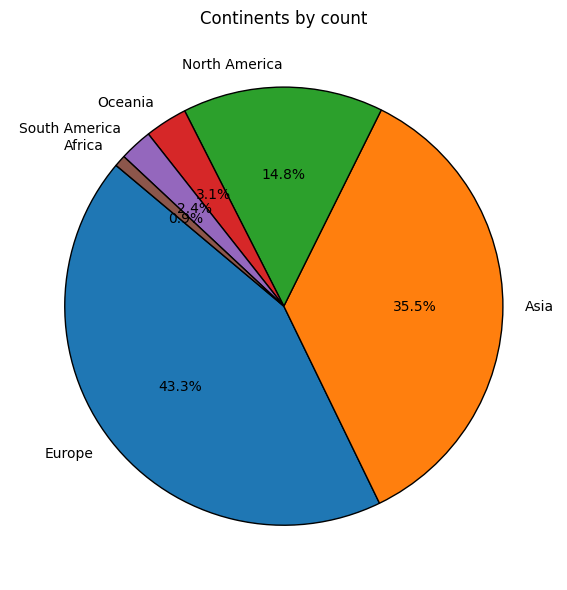

In [46]:
# Plot continents on a piechart to show distribution
continent_counts = df['continents'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    continent_counts,
    labels=continent_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Continents by count")
plt.tight_layout()
plt.show()

In [47]:
# Check value counts of the 3 smaller portions of the piechart
df['continents'].value_counts()

continents
Europe           304
Asia             249
North America    104
Oceania           22
South America     17
Africa             6
Name: count, dtype: int64

In [48]:
# Create a new column combining the three smallest values as rest of world
df['continents'] = df['continents'].replace({
    'Oceania': 'Rest of World',
    'South America': 'Rest of World',
    'Africa': 'Rest of World'
})

# Check counts
df['continents'].value_counts()

continents
Europe           304
Asia             249
North America    104
Rest of World     45
Name: count, dtype: int64

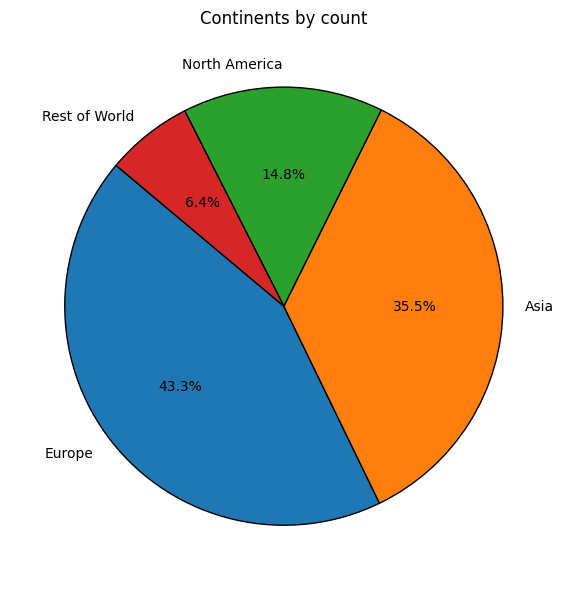

In [49]:
# Plot continents on a piechart again to show new distribution
continent_counts = df['continents'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    continent_counts,
    labels=continent_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Continents by count")
plt.tight_layout()
plt.show()

There was nothing in this dataset to identify any of the students who had taken part in the survey but to make sure this project complies with data ethics and GDPR rules I have changed the student IDs and replaced with values that are +500 to fully anonymise all individuals.

In [50]:
# Create new student IDs to anonymise students on record in line with best practices of data ethics.
new_student_id = df['student_id'].unique()

customer_map = {num: f'Student: {i+500}' for i, num in enumerate(new_student_id)}

df['new_student_id'] = df['student_id'].map(customer_map)

avg_daily_usage_hours was no longer required as it was a float, I prefer to view the amount in minutes to increase readability. 2.2 becomes 132 minutes but can easily be converted back by doing: x/60

In [51]:
# Drop the columns that were no longer needed.
df.drop(columns=['avg_daily_usage_hours', 'student_id'], inplace=True)

In [52]:
# Check new column names
df.columns

Index(['age', 'gender', 'academic_level', 'country', 'most_used_platform',
       'affects_academic_performance', 'sleep_hours_per_night',
       'mental_health_score', 'relationship_status',
       'conflicts_over_social_media', 'addicted_score',
       'average_daily_usage_minutes', 'sleep_per_night_minutes',
       'average_daily_use_by_hour', 'continents', 'new_student_id'],
      dtype='object')

In [53]:
# Check new column inputs
df.head()

,age,gender,academic_level,country,most_used_platform,affects_academic_performance,sleep_hours_per_night,mental_health_score,relationship_status,conflicts_over_social_media,addicted_score,average_daily_usage_minutes,sleep_per_night_minutes,average_daily_use_by_hour,continents,new_student_id
0,19,Female,Undergraduate,Bangladesh,Instagram,Yes,6.5,6,In Relationship,3,8,312.0,390.0,5,Asia,Student: 500
1,22,Male,Graduate,India,Twitter,No,7.5,8,Single,0,3,126.0,450.0,2,Asia,Student: 501
2,20,Female,Undergraduate,USA,TikTok,Yes,5.0,5,Complicated,4,9,360.0,300.0,6,North America,Student: 502
3,18,Male,High School,UK,YouTube,No,7.0,7,Single,1,4,180.0,420.0,3,Europe,Student: 503
4,21,Male,Graduate,Canada,Facebook,Yes,6.0,6,In Relationship,2,7,270.0,360.0,4,North America,Student: 504


In [54]:
# Check column names and order
df.columns

Index(['age', 'gender', 'academic_level', 'country', 'most_used_platform',
       'affects_academic_performance', 'sleep_hours_per_night',
       'mental_health_score', 'relationship_status',
       'conflicts_over_social_media', 'addicted_score',
       'average_daily_usage_minutes', 'sleep_per_night_minutes',
       'average_daily_use_by_hour', 'continents', 'new_student_id'],
      dtype='object')

In [55]:
# Check number of columns, to make sure the amount (16) stays the same post re-ordering
df.columns.nunique()

16

I have opted for this column order to try and keep relevant fields together. The person's individual profile in the first columns, followed by their location, then the health columns are next looking at time spent on their most popular platform, the amount of sleep they're getting, then the effects the app is having on that individual, how it is affecting their wider life, is level of attainment and mental health being affected by their use of social media and to what extent.

In [56]:
# Create new list for column order. Apply it to df
new_column_order = [
    'new_student_id', 'age', 'gender', 'relationship_status', 'academic_level', 'country', 'continents', 'most_used_platform', 'average_daily_usage_minutes', 'average_daily_use_by_hour', 'sleep_per_night_minutes', 'sleep_hours_per_night', 'conflicts_over_social_media', 'affects_academic_performance', 'addicted_score', 'mental_health_score'
]

df = df[new_column_order]

In [57]:
# Check the number of columns remains the same (16)
df.columns.nunique()

16

In [58]:
# Look over dataframe
df.head()

,new_student_id,age,gender,relationship_status,academic_level,country,continents,most_used_platform,average_daily_usage_minutes,average_daily_use_by_hour,sleep_per_night_minutes,sleep_hours_per_night,conflicts_over_social_media,affects_academic_performance,addicted_score,mental_health_score
0,Student: 500,19,Female,In Relationship,Undergraduate,Bangladesh,Asia,Instagram,312.0,5,390.0,6.5,3,Yes,8,6
1,Student: 501,22,Male,Single,Graduate,India,Asia,Twitter,126.0,2,450.0,7.5,0,No,3,8
2,Student: 502,20,Female,Complicated,Undergraduate,USA,North America,TikTok,360.0,6,300.0,5.0,4,Yes,9,5
3,Student: 503,18,Male,Single,High School,UK,Europe,YouTube,180.0,3,420.0,7.0,1,No,4,7
4,Student: 504,21,Male,In Relationship,Graduate,Canada,North America,Facebook,270.0,4,360.0,6.0,2,Yes,7,6


In [59]:
# Post cleaning summary of the data
print(f'After cleaning the shape of the data is: {df.shape}')
print("\n")
print(f'The column names are: {df.columns}')
print("\n")
print(f'This data is ready to export for visualisation✅')


After cleaning the shape of the data is: (702, 16)


The column names are: Index(['new_student_id', 'age', 'gender', 'relationship_status',
       'academic_level', 'country', 'continents', 'most_used_platform',
       'average_daily_usage_minutes', 'average_daily_use_by_hour',
       'sleep_per_night_minutes', 'sleep_hours_per_night',
       'conflicts_over_social_media', 'affects_academic_performance',
       'addicted_score', 'mental_health_score'],
      dtype='object')


This data is ready to export for visualisation✅


In [60]:
df.to_csv('../data/cleaned_data/student_social_media_addiction_cleaned.csv', index=False)

To ensure transparent data handling:

- Raw data is preserved unchanged in the 'data/raw' folder.
- Cleaned data is saved separately as `student_social_media_addiction_cleaned.csv`.
- File naming follows a consistent structure to support reproducibility.
- Version control (Git) is used to track changes, document decisions, and allow rollback should errors occur
- This separation ensures that the analysis is transparent and meets data governance best practices.


Although this dataset is anonymised, data projects carry ethical responsibilities:

- Privacy: No personally identifiable information is used. The dataset consists only of behavioural survey responses.
- Bias: There was a conscious effort made to pick a dataset that had representation from different genders, nationalities, social media habits to produce the best results.
- Fairness: Data is interpreted cautiously to avoid making harmful generalisations about groups.
- GDPR: Data is stored securely, and only aggregated results are reported.

These considerations guide how findings will be communicated in later notebooks and the dashboard.


AI assistance (e.g. Copilot / ChatGPT) was used during this notebook for:

- Mapping country to continents
- Code correction when plotting graphs to try and included mean, median and mode legends
- Checking code quality, had it been written in the most efficient format

All AI-generated input was reviewed, validated, and modified to ensure correctness.
